In [1]:
from collections import Counter

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from preprocessing.corpus import build_corpus
from preprocessing.data_preparation import prepare_and_merge_datasets
from wordcloud import WordCloud

In [8]:
df_dataset = pd.read_csv("data/preprocessed/dataset.csv", index_col=0)
df_dataset.head()

,class,content
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,#2013Faves RT @grahamorama: #Snoop and #Justin...
2,0,"#AZmonsoon lot of rain, too bad it wasn't enou..."
3,1,#AskDems Aren't you embarrassed that Charlie R...
4,1,#BREAKING: AP calls Mass. Governor race for Ch...


In [21]:
hate_speech = build_corpus(df_dataset[df_dataset["class"] == 0])
non_hate_speech = build_corpus(df_dataset[df_dataset["class"] == 1])

hate_speech.head()

/Users/d067664/Documents/Uni/3. Semester/Text Analytics/HateSpeechDetection/src/preprocessing/corpus.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["content"].str.lower().str.replace("[^a-zA-Z ]", "")
/Users/d067664/Documents/Uni/3. Semester/Text Analytics/HateSpeechDetection/src/preprocessing/corpus.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["all_tokens"] = dataframe["content"].apply(lambda cell: tokenize(cell))
/Users/d067664/Documents/Uni/3. Semester/Text Analytics/Hat

,class,content,all_tokens,tokens_without_stopwords,cleaned_tokens,stems
2,0,azmonsoon lot of rain too bad it wasnt enough ...,"[azmonsoon, lot, of, rain, too, bad, it, was, ...","[azmonsoon, lot, rain, bad, nt, wash, away, te...","[azmonsoon, lot, rain, bad, wash, away, teabag...","[azmonsoon, lot, rain, bad, wash, away, teabag..."
11,0,california is full of white trash,"[california, is, full, of, white, trash]","[california, white, trash]","[california, white, trash]","[california, white, trash]"
12,0,california is full of white trash who moved fr...,"[california, is, full, of, white, trash, who, ...","[california, white, trash, moved, oklahoma]","[california, white, trash, moved, oklahoma]","[california, white, trash, move, oklahoma]"
14,0,dtla is trash because of noneuropeans are allo...,"[dtla, is, trash, because, of, noneuropeans, a...","[dtla, trash, noneuropeans, allowed, live]","[dtla, trash, noneuropeans, allowed, live]","[dtla, trash, noneuropean, allow, live]"
17,0,dutch farmers are white trash,"[dutch, farmers, are, white, trash]","[dutch, farmers, white, trash]","[dutch, farmers, white, trash]","[dutch, farmer, white, trash]"


In [72]:
def generate_barchart(datacolumn, n=15, title="Bar chart"):
    counter = Counter(datacolumn.explode())
    n_most_common = counter.most_common(n)
    x = np.array(n_most_common).T[0]
    list_of_tuples = list(zip(*n_most_common))
    list_of_lists = [list(elem) for elem in list_of_tuples]
    plt.bar(np.array(list_of_lists[0]), np.array(list_of_lists[1]))
    plt.xticks(range(0, x.shape[0]), x, rotation='vertical')
    plt.title(title)
    plt.show()

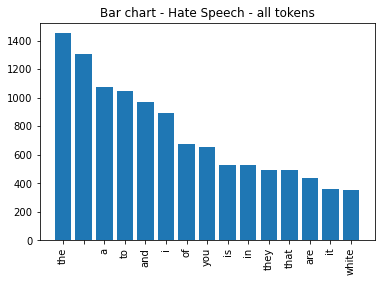

In [75]:
generate_barchart(hate_speech["all_tokens"], title="Bar chart - Hate Speech - all tokens")

In [90]:
def generate_wordcloud(datacolumn, n=15, title="Wordcloud"):
    counter = Counter(datacolumn.explode())
    n_most_common = counter.most_common(n)
    x = np.array(n_most_common).T[0]
    n_most_common_words_as_string = (" ").join(x)
    wordcloud = WordCloud(background_color="white", stopwords={}).generate(n_most_common_words_as_string)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis("off")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.show()

In [82]:
def create_visualizations(dataset, name, n=15):
    generate_barchart(dataset["all_tokens"], title="Bar chart - " +  name + " - all tokens")
    generate_wordcloud(dataset["all_tokens"], title="Wordcloud - " +  name + " - all tokens")
    generate_barchart(dataset["cleaned_tokens"], title="Bar chart - " +  name + " - cleaned tokens")
    generate_wordcloud(dataset["cleaned_tokens"], title="Wordcloud - " +  name + " - cleaned tokens")
    generate_barchart(dataset["stems"], title="Bar chart - " +  name + " - stems")
    generate_wordcloud(dataset["stems"], title="Wordcloud - " +  name + " - stems")

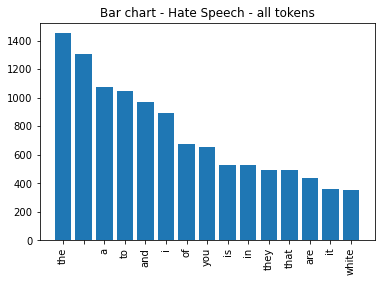

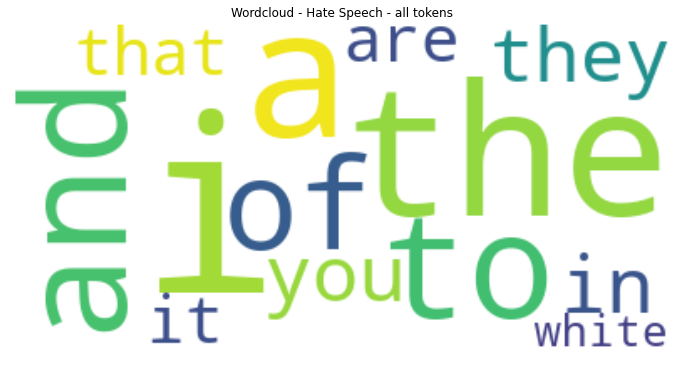

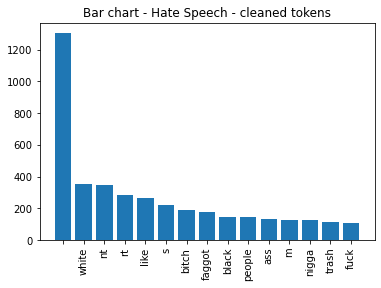

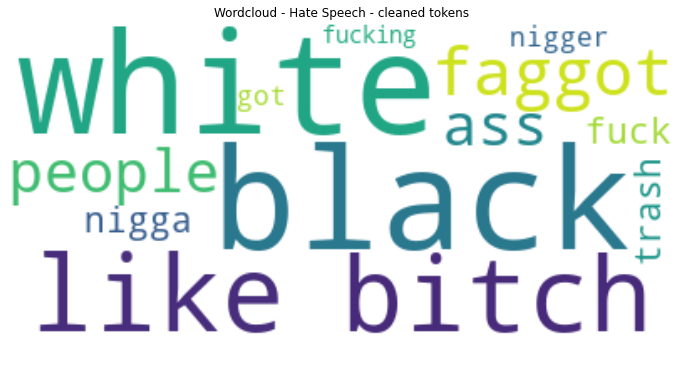

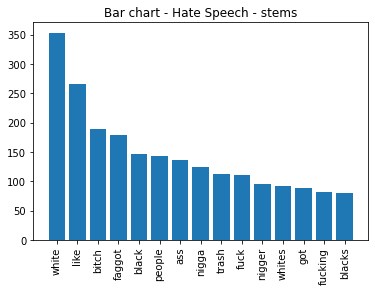

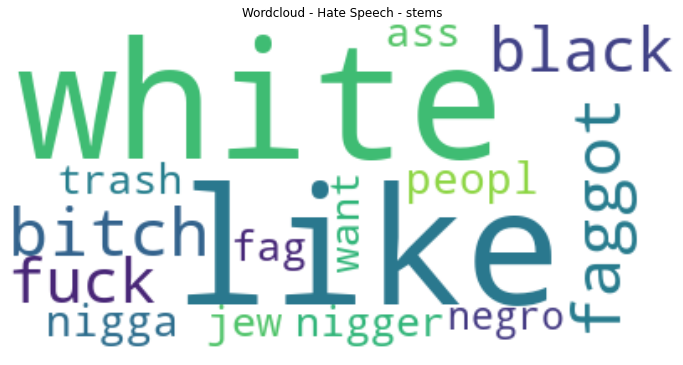

In [91]:
create_visualizations(hate_speech, "Hate Speech", n=15)

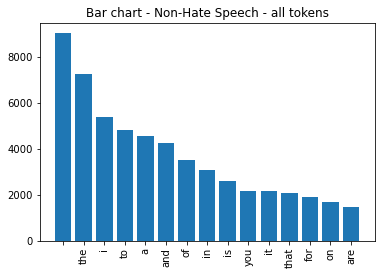

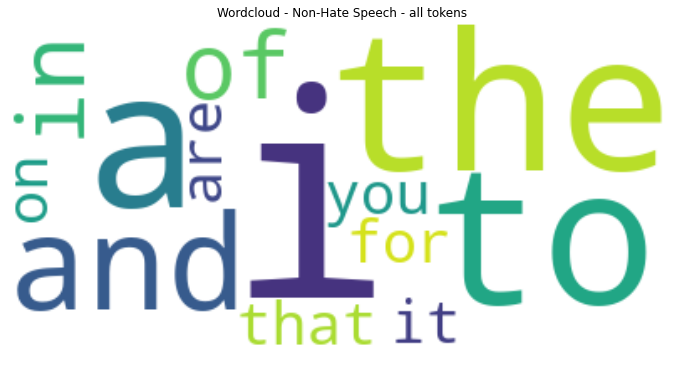

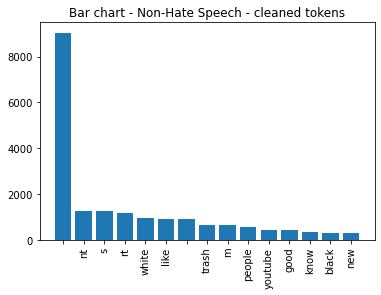

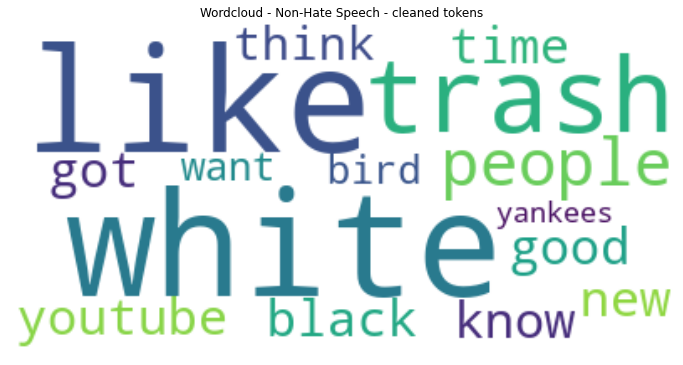

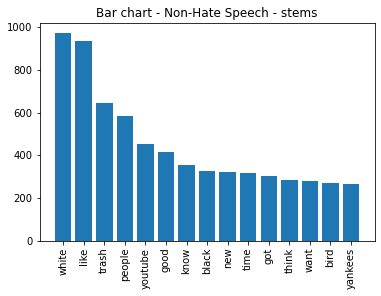

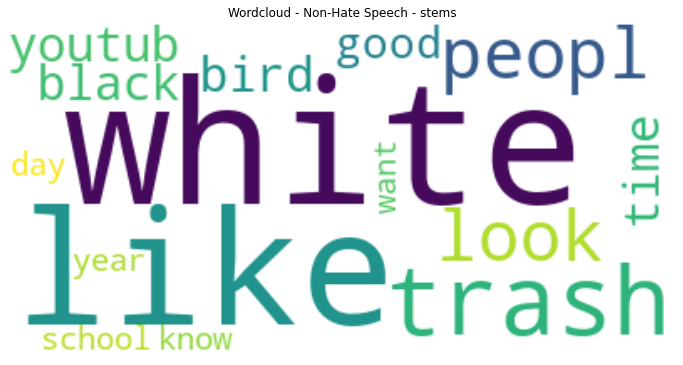

In [85]:
create_visualizations(non_hate_speech, "Non-Hate Speech", n=15)